1. activate py36 으로 ㄱㄱ


2. django-admin startproject mysite(**어제 만들었던 것에 할거면 안해도 됌**)


3. cd\AI\Web\mysite 후 python manage.py startapp ajax (**ajax라는 폴더 만들어짐**--> **dir**을 콘솔창에 입력해서 확인가능)


4. mysite>ajax가서 urls.py 파일을 만들어서 다음 셀을 입력

In [ ]:
from django.urls import path
from . import views
 
urlpatterns = [
    path('', views.index),
    path('calcform', views.calcForm),
]

5. mysite>mysite>urls.py로 가서 
path("ajax/', include("ajax.urls")) 를 추가한다.


6. mysite>ajax>views.py 파일을 다음 셀의 내용으로 수정한다.

In [ ]:
from django.shortcuts import render
from django.http import HttpResponse


def index(request) :
    return HttpResponse("Hello ajax~~~")

def calcForm(request) :
    return render(request, "ajax/calc.html")

7. python manage.py runserver 실행


8. mysite>templates>ajax에서 calc.html이란 파일을 만들고 다음 셀의 내용을 넣는다.(**동기식임** -> `<form>`이 있어서)

In [ ]:
<form  action="calc" >
<input type=text name=op1 id="op1">  + <input type=text name=op2 id="op2">
<button id="btnCalc">=</button> <input type=text name="result" id="result">
</form>

9. 127.0.0.1:8000/ajax/calcform으로 웹브라우저의 URL에 입력해서 페이지로 이동한다. 그러면 밑의 사진이 뜰것이다.(근데 첫 두개의 창에 숫자 아무렇게 넣고 등호 버튼을 누르면 오류뜸)

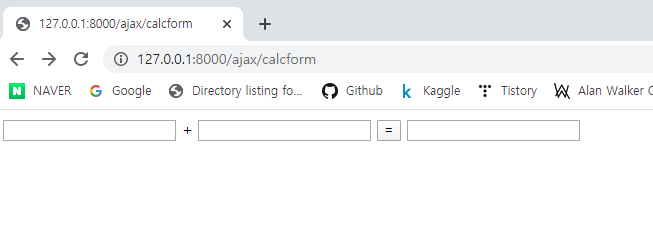

### 실제로 덧셈하기

10. mysite>ajax>urls.py 파일에서 path하나 더 추가한다.
    - path('calc', views.calc)


11. 덧셈을 실제로 하기 위해서 mysite>ajax>views.py라는 파일에 다음 함수를 하나 더 추가한다.

In [ ]:
def calc(request):
    op1 = int(request.GET["op1"])
    op2 = int(request.GET["op2"])
    result = op1 + op2
    return HttpResponse(f"result = {result}")

12. 그러면 127.0.0.1:8000/ajax/calcform에서 첫 두개의 창에 숫자 아무렇게 넣고 등호 버튼을 누르면 실제로 계산이 됌을 알 수 있다.


13. mysite>templates>ajax>calc.html파일의 내용 전체를 다음과 같이 수정한다.

In [ ]:
<script src="http://code.jquery.com/jquery-1.11.3.min.js"></script>
<script src="http://code.jquery.com/jquery-migrate-1.2.1.min.js"></script>


<form  action="calc" >
<input type=text name=op1 id="op1" value="5">  + <input type=text name=op2 id="op2">
<button id="btnCalc">=</button> <input type=text name="result" id="result">
</form>

<script>
     op1 = document.getElementById("op1");
     op1.value = 20;
     alert(op1.value);
</script>

14. 다시 웹브라우저의 127.0.0.1:8000/ajax/calcform에서 아무 숫자나 넣고 결과 확인해보자

---

## 비동기식 방식

15. site>templates>ajax>calc.html파일의 내용 전체를 다음과 같이 수정한다.

In [ ]:
<script src="http://code.jquery.com/jquery-1.11.3.min.js"></script>
<script src="http://code.jquery.com/jquery-migrate-1.2.1.min.js"></script>



<input type=text name=op1 id="op1" value="5">  + <input type=text name=op2 id="op2">
<button id="btnCalc">=</button> <input type=text name="result" id="result">


<script>
    /* 여긴 주석처리
     op1 = document.getElementById("op1");
     op1.value = 20;
     alert(op1.value);

     $("#op1").val(40);  #은 id를 의미, val은 value임
     alert($("#op1").val()  );
     */

     $("#btnCalc").click( function() {
        /*
        op1 = parseInt($("#op1").val());
        op2 = parseInt($("#op2").val());
        $("#result").val(op1 + op2));
        */

        var param = {op1:$("#op1").val(), op2:$("#op2").val()};
        $.get("/ajax/calc", param, function(data) {       // 여긴 그냥 http의 get방식으로 가져온다는 소리
         alert(JSON.stringify(data));
         $("#result").val(data.result);
        });

      });
</script>

16. mysite>ajax>views.py에서 calc함수를 다음과 같이 고친다.

In [ ]:
def calc(request):
    op1 = int(request.GET["op1"])
    op2 = int(request.GET["op2"])
    result = op1 + op2
    # return HttpResponse(f"결과 = {result}")
    # return HttpResponse("{'result':" + str(result) + "}")
    return JsonResponse({'error':0  'result':result}) # Json형태로 리턴해줌

17. 그럼 결과를 알려주는 알림이 잠깐 뜨고 결과창에 결과도 나온다.

---

### 로그인 성공하면 화면 전환하고 실패하면 다시 원래 로그인 하는 페이지로 돌아가기

18. mysite>ajax>urls.py에서 path를 추가한다.
    - path('login', views.login)
    
    
19. mysite>ajax>views.py에서 다음의 login함수를 추가한다.

In [ ]:
def login(request):
    id = request.GET["id"]
    pwd = request.GET["pwd"]
    if id == pwd :
        request.session["user"] = id
        return JsonResponse({'error':0})
    return Jsonresponse({'error':-1, 'message':'id/pwd를 확인해주세요'})

20. mysite>templates>ajax에서 login.html파일을 하나 만든 후, 같은 디렉토리에 있는 calc.html을 복사해서 수정을 한다. login.html파일의 내용은 다음 셀과 같다.

In [ ]:
<script src="http://code.jquery.com/jquery-1.11.3.min.js"></script>
<script src="http://code.jquery.com/jquery-migrate-1.2.1.min.js"></script>

<input type=text name=id id="id">  <br>
<input type=password name=pwd id="pwd"> <br>
<button id="btnCalc">로그인</button>


<script>
     $("#btnCalc").click( function() {
        var param = {id:$("#id").val(), pwd:$("#pwd").val()};
        $.get("/ajax/login", param, function(data) {       // 여긴 그냥 http의 get방식으로 가져온다는 소리
         console.log(JSON.stringify(data));
         if ( data.error == 0) location.href = "/ajax"
         else {
            $("#id").focus();
            $("#id").val("");  // id를 리셋함
            $("#pwd").val("");   // pwd를 리셋함
            alert(data.message);
            }
        });
      });
</script>

21. mysite>ajax>urls.py에서 path를 추가한다.
    - path('loginform', views.loginFrom)
    
    
22. mysite>ajax>views.py에서 다음 셀과 같이 loginForm이라는 함수를 추가한다.

In [ ]:
def loginForm(request):
    return render(request, "ajax/login.html")

23. 이제 127.0.0.1:8000/ajax/loginform에서 id=pwd인 경우와 id!=pwd인 경우를 직접 입력해서 결과를 보자

---

24. mysite>templates>ajax에 upload.html파일을 만들고 다음 셀과 같은 내용을 입력한다.

In [ ]:
<html>
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
</head>

<style>
  .progress { position:relative; width:400px; border: 1px solid #ddd; padding: 1px; border-radius: 3px; }
  .bar { background-color: #B4F5B4; width:0%; height:20px; border-radius: 3px; }
  .percent { position:absolute; display:inline-block; top:3px; left:48%; }
</style>

<script src="https://code.jquery.com/jquery-3.3.1.min.js"></script>
<script src="http://malsup.github.com/jquery.form.js"></script>



<form action="upload" enctype="multipart/form-data" method="POST">
      <input name="title" value="테스트1"/>
      <input name="contents" value="테스트 자료입니다."/>
      <input type="file" name="file1"/>
      <input type="submit" value="upload">
</form>




<div class="progress">  // progress라는 class는 논리적으로 bar라는 class와 percent라는 class를 묶어주기 위해서 있다고 생각
    <div class="bar"></div>
    <div class="percent">0%</div>
</div>
<div id="status"></div>


<script>
$(function() {
    var bar = $('.bar');  //$는 jquery라는 함수로서 .을 이용해 'bar'라는 class를 찾는 것!
    var percent = $('.percent');  // 'percent'라는 class를 찾음
    var status = $('#status');
    $('form').ajaxForm({
        beforeSend: function() {      // 보내기 전. beforeSend라는 함수 실행
            status.empty();
            var percentVal = '0%';
            bar.width(percentVal);
            percent.html(percentVal);
        },
        uploadProgress: function(event, position, total, percentComplete) {     //보내는 중. uploadProgress라는 함수를 실행
            var percentVal = percentComplete + '%';
            bar.width(percentVal);
            percent.html(percentVal);
        },
        complete: function(xhr) {       // 업로드 끝났을 때. complete라는 함수 실행
           status.html("성공")
        },
       error:function(e){          // 업로드 실패했을 때. error라는 함수 실행
          status.html("실패")
       }

    });
});

 </script>

25. mysite>ajax>views.py에서 path 2개를 더 추가한다.
    - path('uploadform', views.uploadForm),
    - path('upload', views.upload)
    

26. mysite>ajax>views.py에 uploadForm, upload 두 개의 함수를 다음 셀과 같이 추가한다.

In [ ]:
def uploadForm(request):
    return render(request, "ajax/upload.html")

def upload(request) :

    file = request.FILES['file1']
    filename = file._name
    fp = open(settings.BASE_DIR + "/static/" + filename, "wb")
    for chunk in file.chunks() :
        fp.write(chunk)
    fp.close()
    return HttpResponse("upload~")

27. 127.0.0.1:8000/ajax/uploadform에서 아무거나 업로드 해보기(세세한 부분사항은 mysite>templates>ajax>upload.html파일을 참고하며 이해하기)

---

28. {%crsf_token%} 이 뭘까....

---

## 주피터 노트북 비스무리한거 만들어보기

29. 주피터노트북도 생각해보면 비동기방식.. mysite>templates>ajax에서 runpython.html을 만들고 다음 셀의 내용을 입력하자

In [ ]:
<script src="http://code.jquery.com/jquery-1.11.3.min.js"></script>
<script src="http://code.jquery.com/jquery-migrate-1.2.1.min.js"></script>


<div>
    <textarea rows="20" cols="40" id="code"> </textarea>
    <button id="btnRun">실행</button>
    <div id="result">result</div>
</div>


<script>
     $("#btnRun").click( function() {
           var param = {code:$("#code").val()};
           $.get("/ajax/runpython", param, function(data) {
             $("#result").html(data)
             }
           });
     });
</script>

30. mysite>templates>ajax로 직접 폴더 열고 들어가서 runpython.html을 직접 실행시켜보자

31. mysite>ajax>views.py에서 runpythonForm, runpython이라는 함수 2개를 다음 셀과 같이 만들자

In [ ]:
def runpythonForm(request):
    return render(request, "ajax/runpython.html")

def runpython(request) :
    return HttpResponse("code ~~~~~")

32. mysite>ajax>urls.py에서 path 2개를 추가하자
    - path('runpythonform', views.runpythonForm),
    - path('runpython', views.runpython)

33. mysite>ajax>views.py에서 다음의 사항을 추가하자
    - 패키지 추가
        - import sys
        - from io import StringIO
        
    - runpython 함수를 다음 셀처럼 수정

In [ ]:
glo = {}
loc = {}

def runpython(request) :
    code = request.GET["code"]

    original_stdout = sys.stdout
    sys.stdout = StringIO()
    exec(code, glo, loc)
    contents = sys.stdout.getvalue()
    sys.stdout = original_stdout
    contents = contents.replace("\n", "<br>")

    contents = "<font color=red>result</font><br>" + contents
    return HttpResponse(contents)

34. 127.0.0.1:8000/ajax/runpythonform 으로 가서 다음 셀처럼 입력해보고 실행시켜보자. 결과가 웹브라우저창에 바로 나옴을 알 수 있다.

In [ ]:
a = 20
print(a)
print("^^^^^^^^^")
print("==========")

35. mysite>templates>ajax>runpython.html를 다음과 같이 수정한다.

In [ ]:
<script src="http://code.jquery.com/jquery-1.11.3.min.js"></script>
<script src="http://code.jquery.com/jquery-migrate-1.2.1.min.js"></script>

<button id="btnAdd">add cell</button>
<div id="cells" >
<div id="cell">
    <textarea rows="10" cols="40" id="code"> </textarea>
    <button id="btnRun">실행</button>
    <div id="result">result</div>
</div>
</div>

<script>
     $("#btnRun").click( function() {
           var param = {code:$("#code").val()};
           $.get("/ajax/runpython", param, function(data) {
             $("#result").html(data)
           });
     });
    $("#btnAdd").click( function() {
      $("#cells").append($("#cell").clone())
      });

</script>

36. 웹브라우저 127.0.0.1:8000/ajax/runpythonform 페이지에서 